# Explorative Korpusanalyse des Datensatzes Wissenschaftlerinnen

## Vorbereitung

Daten einlesen

In [104]:
import pandas as pd
import nltk
import spacy
from collections import Counter
from spacy.tokens import Doc
from tqdm.notebook import tqdm

In [105]:
nlp = spacy.load('de_core_news_sm')

In [106]:
tweets_wissenschaft = pd.read_excel("./data/tweets_wissenschaftlerinnen.xlsx")
accounts_wissenschaft = pd.read_excel('./data/accounts_wissenschaftlerinnen.xlsx')

In [107]:
def update_astype_tweets(df):
    df['tweet_text'] = df['tweet_text'].astype(str)
    df['tweet_text'] = df['tweet_text'].replace('-998', '')
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].astype(str)
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].replace('-998', '')
    df['zitat_text'] = df['zitat_text'].astype(str)
    df['zitat_text'] = df['zitat_text'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

def update_astype_bios(df):
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

In [108]:
update_astype_tweets(tweets_wissenschaft)
update_astype_bios(accounts_wissenschaft)

Laden der Spacy Docs

In [109]:
def load_spacy_docs_tweets(df, name):
    tweet_doc = []
    retweet_doc = []
    zitat_doc = []
    for index, row in df.iterrows():
        filename_tweet = "tweet_" + str(index).replace(" ", "") + ".txt"
        tweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/tweets/{filename_tweet}"))

        filename_retweet = "retweet_" + str(index).replace(" ", "") + ".txt"
        retweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/retweets/{filename_retweet}"))

        filename_zitat = "zitat_" + str(index).replace(" ", "") + ".txt"
        zitat_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/zitat_tweets/{filename_zitat}"))
  
    # add the list of spacy docs as a new column to the dataframe
    df[f"spacy_doc_tweets"] = tweet_doc
    df[f"spacy_doc_retweets"] = retweet_doc
    df[f"spacy_doc_zitat_tweets"] = zitat_doc

In [110]:
def load_spacy_docs_bios(df, name):
    spacy_doc = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        filename_bio = "bio_" + str(index).replace(" ", "") + ".txt"
        spacy_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/{filename_bio}"))
    df[f"spacy_doc_bios"] = spacy_doc

In [111]:
load_spacy_docs_tweets(tweets_wissenschaft, 'tweets_wissenschaftlerinnen')
load_spacy_docs_bios(accounts_wissenschaft, 'bios_wissenschaftlerinnen')

  0%|          | 0/569 [00:00<?, ?it/s]

In [112]:
tweets_wissenschaft.head()

tweet_date_create tweet_creator_atName  \
0 2022-12-14 20:44:13        CorinnaEhlers   
1 2022-12-15 06:42:28        A_SieberEgger   
2 2022-12-15 07:32:40          LeaZentgraf   
3 2022-12-15 08:09:44             LauVoAlb   
4 2022-12-15 08:12:55              7Me11y7   

                           tweet_creator_screenName  \
0  Corinna Ehlers (corinnaehlers@openbiblio.social)   
1                                 Anja Sieber Egger   
2                              Lea Loretta Zentgraf   
3                               Laura von Albedyhll   
4                   7Me11y7-@7Me11y7@nerdculture.de   

                                                                                     tweet_creator_bio  \
0  Grenzgängerin Theologie/Bibliothekswesen im FID Theologie der UB Tübingen. Außerdem: Christentum...   
1  Social und Cultural Anthropologist. Researcher in Educational Anthropology and Educational Ethno...   
2                                        Sociologist at FU Berlin, focus on feminist and food studies.   
3  Forschende, lehrende Kindheitspädagogin | PH Weingarten | Mitglied @gruenebw | Bildungspolitik, ...   
4                     Dr. rer. nat., Psychologie Rationalität und Wissenschaft statt Ideologie 🐶🐶🚲🐰🐰☀️   

                                                                                            tweet_text  \
0                                                                                                        
1                                                                                                        
2                                                                                                        
3                                                                                                        
4  @gartner_jw @quarkswdr Ich finde diese Grafik nicht gelungen. Hier werden 2 Dinge durcheinander ...   

                                                                          retweet_text_retweeted_tweet  \
0  Forschungsstipendien an der Reformationsgeschichtlichen Forschungsbibliothek Wittenberg - Bewerb...   
1  In der 5. Episode «Masken und Impfen» der #Podcast-Serie «SCH*** CORONA – Kinder erzählen aus de...   
2  Heute stellen wir Ximena Alba Villalever und @LeaZentgraf vor, die jeweils über ihre Forschung a...   
3  Mareike Trauernicht hat den 2. Preis der Körber Stiftung im Bereich Sozialwissenschaften für Ihr...   
4                                                                                                        

  zitat_text    gender institution     author_category  \
0             weiblich      Person  Wissenschaftler*in   
1             weiblich      Person  Wissenschaftler*in   
2             weiblich      Person  Wissenschaftler*in   
3             weiblich      Person  Wissenschaftler*in   
4             weiblich      Person    wissenschaftsnah   

                                                                                      spacy_doc_tweets  \
0                                                                                                   ()   
1                                                                                                   ()   
2                                                                                                   ()   
3                                                                                                   ()   
4  (@gartner_jw, @quarkswdr, Ich, finde, diese, Grafik, nicht, gelungen, ., Hier, werden, 2, Dinge,...   

                                                                                    spacy_doc_retweets  \
0  (Forschungsstipendien, an, der, Reformationsgeschichtlichen, Forschungsbibliothek, Wittenberg, -...   
1  (In, der, 5., Episode, «, Masken, und, Impfen, », der, #, Podcast-Serie, «, SCH, *, *, *, CORONA...   
2  (Heute, stellen, wir, Ximena, Alba, Villalever, und, @LeaZentgraf, vor, ,, die, jeweils, über, i...   
3  (Mareike, Trauernicht, hat, den, 2., Preis, der, Körber, Stiftung, im, B

In [113]:
accounts_wissenschaft.head()

tweet_creator_atName        tweet_creator_screenName  \
0      lisacarstensen5  @lisacarstensen@toot.community   
1       MarieA54621399                           Marry   
2       MissCastleland                            Doro   
3         ml_schreiter           Marie Luise Schreiter   
4         AndreaRumpel                   Andrea Rumpel   

                                                                                     tweet_creator_bio  \
0  Social Scientist, she/her, Global Political Economy of Labour and Intersectionality @GLU_Network...   
1                                                                                               Ärztin   
2                                                                                            Juristin.   
3  Post-doc @uni_tue / Cognitive Neurophysiology Phd @tudresden_de / former @SussexUni. @DrMLS@mast...   
4  social und educational scientist | (flight) migration und health politics @unidue @iaq_due | #Me...   

     gender institution     author_category  \
0  weiblich      Person  Wissenschaftler*in   
1  weiblich      Person    wissenschaftsnah   
2  weiblich      Person    wissenschaftsnah   
3  weiblich      Person  Wissenschaftler*in   
4  weiblich      Person  Wissenschaftler*in   

                                                                                        spacy_doc_bios  
0  (Social, Scientist, ,, she, /, her, ,, Global, Political, Economy, of, Labour, and, Intersection...  
1                                                                                             (Ärztin)  
2                                                                                        (Juristin, .)  
3  (Post-doc, @uni_tue, /, Cognitive, Neurophysiology, Phd, @tudresden_de, /, former, @SussexUni, ....  
4  (social, und, educational, scientist, |, (, flight, ), migration, und, health, politics, @unidue...

## Statistiken

### Verhältnis Tweets - Retweets - Zitierte Tweets

In [114]:
def count_tweet_type(df):
    count_tweets = (df['spacy_doc_tweets'].apply(lambda doc: len(doc) > 0)).sum() 
                     
    count_retweets = (df['spacy_doc_retweets'].apply(lambda doc: len(doc) > 0)).sum()

    count_zitat =  (df['spacy_doc_zitat_tweets'].apply(lambda doc: len(doc) > 0)).sum()
    
    # Gesamtanzahl der Zeilen im DataFrame
    total_rows = len(df)

    # Berechnung der relativen Häufigkeiten
    relative_tweets = count_tweets / total_rows
    relative_retweets = count_retweets / total_rows
    relative_zitat = count_zitat / total_rows

    print(f"Anzahl Tweets: {count_tweets} ({relative_tweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl Retweets: {count_retweets} ({relative_retweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl zitierte Tweets: {count_zitat} ({relative_zitat:.2%} der Gesamtanzahl)")

In [115]:
count_tweet_type(tweets_wissenschaft)

Anzahl Tweets: 477 (39.72% der Gesamtanzahl)
Anzahl Retweets: 724 (60.28% der Gesamtanzahl)
Anzahl zitierte Tweets: 338 (28.14% der Gesamtanzahl)


### Verteilung der Accounts

In [116]:
accounts_wissenschaft.shape

(569, 7)

In [117]:
accounts_wissenschaft['institution'].value_counts()

institution
Person    569
Name: count, dtype: int64

In [118]:
category_counts = accounts_wissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Accounts nach Kategorie:")
print(category_percentages)

Anzahl der Accounts nach Kategorie:
author_category
Wissenschaftler*in                407
wissenschaftsnah                  158
Wissenschaftsnahe Politiker*in      4
Name: count, dtype: int64

Prozentsatz der Accounts nach Kategorie:
author_category
Wissenschaftler*in                71.528998
wissenschaftsnah                  27.768014
Wissenschaftsnahe Politiker*in     0.702988
Name: count, dtype: float64


In [119]:
accounts_wissenschaft[accounts_wissenschaft['institution'] == 'Person']['gender'].value_counts()

gender
weiblich    569
Name: count, dtype: int64

### Verteilung der Tweets

In [120]:
tweets_wissenschaft.shape

(1201, 13)

In [121]:
tweets_wissenschaft['institution'].value_counts()

institution
Person    1201
Name: count, dtype: int64

In [122]:
category_counts = tweets_wissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Tweets nach Kategorie:")
print(category_percentages)

Anzahl der Tweets nach Kategorie:
author_category
Wissenschaftler*in                830
wissenschaftsnah                  363
Wissenschaftsnahe Politiker*in      8
Name: count, dtype: int64

Prozentsatz der Tweets nach Kategorie:
author_category
Wissenschaftler*in                69.109076
wissenschaftsnah                  30.224813
Wissenschaftsnahe Politiker*in     0.666112
Name: count, dtype: float64


In [123]:
tweets_wissenschaft[tweets_wissenschaft['institution'] == 'Person']['gender'].value_counts()

gender
weiblich    1201
Name: count, dtype: int64

### Token + Sentences

In [124]:
def get_token_sent_counts(df):
    result = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        token_counter = 0
        sentence_counter = 0
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            spacy_doc = row[f"spacy_doc_{name}"]
            # Überprüfe, ob das Spacy-Dokument nicht leer ist
            if len(spacy_doc) > 0:
                for sent in spacy_doc.sents:
                    sentence_counter += 1
                    for token in sent:
                        # Überprüfen Sie die Token-Eigenschaften für die Filterung
                        if not (token.is_punct or
                                token.is_space or
                                token.is_digit or
                                token.is_quote or
                                token.like_url or
                                token.like_email):
                            token_counter += 1
        result[name] = (token_counter, sentence_counter)
    return result


In [125]:
counts = get_token_sent_counts(tweets_wissenschaft)

  0%|          | 0/1201 [00:00<?, ?it/s]

  0%|          | 0/1201 [00:00<?, ?it/s]

  0%|          | 0/1201 [00:00<?, ?it/s]

In [126]:
data = {'Category': ['Tokens', 'Sentences'],
        'Tweets': [counts['tweets'][0], counts['tweets'][1]],
        'Retweets': [counts['retweets'][0], counts['retweets'][1]],
        'Zitierte Tweets': [counts['zitat_tweets'][0], counts['zitat_tweets'][1]],
       }

tok_sent = pd.DataFrame(data)
tok_sent

Category  Tweets  Retweets  Zitierte Tweets
0     Tokens   12581     21887            10028
1  Sentences    1482      2497             1158

In [127]:
def stats(counts, column, df):
    valid_rows = sum(1 for index, row in df.iterrows() if len(row[f"spacy_doc_{column}"]) > 0)
    mean_tok = counts[column][0] / valid_rows
    mean_sent = counts[column][1] / valid_rows
    tok_per_sent = counts[column][0] / counts[column][1]
    return [mean_tok, mean_sent, tok_per_sent]

In [128]:
data = {'Category': ['Mean Tokens per Tweet', 'Mean Sentences per Tweet', 'Tokens per Sentence'],
        'Tweets': stats(counts, 'tweets', tweets_wissenschaft) ,
        'Retweets': stats(counts, 'retweets', tweets_wissenschaft) ,
        'Zitierte Tweets': stats(counts, 'zitat_tweets', tweets_wissenschaft) ,
       }
tok_sent_stats = pd.DataFrame(data)
tok_sent_stats

Category     Tweets   Retweets  Zitierte Tweets
0     Mean Tokens per Tweet  26.375262  30.230663        29.668639
1  Mean Sentences per Tweet   3.106918   3.448895         3.426036
2       Tokens per Sentence   8.489204   8.765318         8.659758

#### Type-Token Verhältnis

Lemmas extrahieren

In [129]:
def get_lemmas(df):
    lemmas = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        lemmas[name] = []  # Initialisieren Sie die Liste für den Schlüssel 'name'
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            for token in row[f"spacy_doc_{name}"]:
                if not token.is_punct and \
                    not token.is_space and \
                    not token.is_bracket and \
                    not token.is_digit and \
                    not token.is_quote and \
                    not token.like_url and \
                    not token.like_email:
                    lemmas[name].append(token.lemma_)
    return lemmas

In [130]:
lemmas_tweets = get_lemmas(tweets_wissenschaft)

  0%|          | 0/1201 [00:00<?, ?it/s]

  0%|          | 0/1201 [00:00<?, ?it/s]

  0%|          | 0/1201 [00:00<?, ?it/s]

Type-Token-Ratio berechnen

In [131]:
from lexical_diversity import lex_div as ld

In [132]:
data = {'Category': ['Type Token Ratio'],
        'Tweets': ld.ttr(lemmas_tweets["tweets"]),
        'Retweets': ld.ttr(lemmas_tweets["retweets"]),
        'Zitierte Tweets': ld.ttr(lemmas_tweets["zitat_tweets"]),
       }
ttr = pd.DataFrame(data)
ttr

Category   Tweets  Retweets  Zitierte Tweets
0  Type Token Ratio  0.32284  0.221821         0.271694

#### Token per Bio

In [133]:
def calculate_token_stats(docs):
    num_tokens = [len(doc) for doc in docs]

    min_tokens = min(num_tokens)
    max_tokens = max(num_tokens)
    avg_tokens = sum(num_tokens) / len(num_tokens)

    return min_tokens, max_tokens, avg_tokens

min_tokens, max_tokens, avg_tokens = calculate_token_stats(accounts_wissenschaft['spacy_doc_bios'])

print("Minimal tokens in bio:", min_tokens)
print("Maximal tokens in bio:", max_tokens)
print("Durchschnittliche tokens in bio:", avg_tokens)

Minimal tokens in bio: 0
Maximal tokens in bio: 40
Durchschnittliche tokens in bio: 19.446397188049207


## Häufigste Wörter

### Tweets

#### WordCloud Funktion

In [134]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [135]:
def create_wordcloud(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [136]:
def create_wordcloud_vertical(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=700, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Die häufigsten Wörter 1 - ohne Stoppwörter

In [137]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter
import string

In [138]:
def filter_tokens(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

In [139]:
def common_words1(df, name):
    words = []
    for doc in df[f"spacy_doc_{name}"]:
        if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
            words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(50)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [140]:
def common_words_all1(df):
    words = []
    names = ["tweets", "retweets", "zitat_tweets"]
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
                words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [141]:
common_words_tweets = common_words1(tweets_wissenschaft, 'tweets')
common_words_retweets = common_words1(tweets_wissenschaft, 'retweets')
common_words_zitat_tweets = common_words1(tweets_wissenschaft, 'zitat_tweets')
common_words_all = common_words_all1(tweets_wissenschaft)

In [142]:
common_words_tweets

word  freq
0          forschung   308
1              lehre    31
2            phdlife    29
3        ichbinhanna    27
4            wichtig    26
5                  1    24
6                 --    24
7       wissenschaft    23
8             wissen    21
9           brauchen    21
10           einfach    18
11            finden    17
12            mensch    17
13            studie    16
14             sehen    16
15                 ️    16
16             frage    15
17                 👇    14
18                 3    14
19           aktuell    14
20             mecfs    13
21            freuen    13
22          spannend    13
23         longcovid    13
24             danke    13
25                 2    12
26             lesen    12
27             thema    12
28            zeigen    12
29           bereich    12
30               mal    12
31      ichbinreyhan    12
32           artikel    12
33            arbeit    11
34           politik    11
35  @karl_lauterbach    11
36           letzter    11
37               gut    11
38     funktionieren    10
39          sprechen    10
40               neu    10
41            denken    10
42           glauben    10
43            helfen    10
44                      10
45               uni    10
46         schreiben    10
47              geld    10
48       betroffener    10
49           problem    10

In [143]:
common_words_retweets

word  freq
0      forschung   522
1          lehre    69
2   wissenschaft    65
3    ichbinhanna    64
4              ️    52
5       brauchen    49
6          mecfs    47
7         mensch    45
8      longcovid    41
9           2023    36
10             1    35
11         thema    33
12      wisskomm    33
13         innen    32
14       wichtig    32
15            --    31
16          toll    30
17        studie    28
18           the    27
19      forschen    26
20         infos    26
21             3    25
22           mal    25
23       einfach    25
24        freuen    25
25       aktuell    24
26        suchen    24
27       projekt    24
28             ➡    24
29        sofort    24
30     anmeldung    24
31          frau    22
32        stelle    22
33     jahrzehnt    22
34             ‍    22
35    versorgung    22
36   betroffener    21
37             👉    21
38         frage    20
39      spannend    20
40         gerne    20
41             🔬    20
42       bereich    19
43        wissen    19
44         danke    19
45       bildung    19
46    @bmbf_bund    19
47     bundestag    19
48          2022    18
49             +    18

In [144]:
common_words_zitat_tweets

word  freq
0          forschung   199
1                  ️    45
2              lehre    40
3                 --    38
4          gemeinsam    30
5      demonstrieren    30
6               2023    29
7                  ➡    27
8        ichbinhanna    27
9       wissenschaft    27
10               the    26
11          brauchen    23
12                 👇    20
13                1.    19
14       information    19
15          research    18
16             liebe    18
17         verlässen    18
18                 1    17
19             klima    17
20               uni    17
21         professor    16
22                 👉    16
23               for    16
24              team    16
25        innovation    16
26           aufgabe    16
27             falls    16
28             lesen    15
29                to    15
30            lothar    15
31                h.    15
32            wieler    15
33               rki    15
34             april    15
35               amt    15
36       niederlegen    15
37            widmen    15
38  pressemitteilung    15
39         @bmg_bund    15
40       dankewieler    15
41     klimaschützer    15
42              euer    15
43          ansinnen    15
44              ehre    15
45          fleissig    15
46         engagiert    15
47             china    15
48             demos    15
49          dringend    15

In [145]:
common_words_all

word  freq
0          forschung  1029
1              lehre   140
2        ichbinhanna   118
3       wissenschaft   115
4                  ️   113
5                 --    93
6           brauchen    93
7                  1    76
8             mensch    75
9               2023    69
10         longcovid    67
11           wichtig    65
12             mecfs    65
13               the    60
14                 ➡    55
15            studie    54
16          wisskomm    52
17            wissen    49
18             thema    49
19           einfach    49
20            freuen    48
21           aktuell    48
22             innen    47
23           phdlife    47
24                 👇    45
25             sehen    44
26                 3    44
27              toll    44
28            finden    43
29             lesen    42
30                 👉    41
31         gemeinsam    40
32               mal    39
33             frage    39
34               and    38
35          spannend    38
36             infos    38
37       betroffener    38
38            stelle    38
39     demonstrieren    38
40                 ‍    37
41             danke    37
42           bildung    37
43        innovation    37
44          sprechen    36
45               neu    36
46  wissenschaftlich    36
47              frau    36
48          forschen    36
49             gerne    35
50           bereich    35
51           projekt    35
52              team    35
53               for    34
54           politik    34
55             klima    34
56               uni    34
57         anmeldung    34
58                 2    33
59         jahrzehnt    33
60            suchen    33
61       information    32
62            zeigen    31
63              2022    31
64           aufgabe    31
65      ichbinreyhan    31
66               job    30
67                to    30
68        versorgung    30
69                      30
70      unterstützen    30
71       deutschland    30
72             folge    29
73           bringen    29
74          dringend    29
75           beitrag    29
76          research    29
77                1.    29
78            arbeit    28
79           stellen    28
80                 +    28
81         forschend    28
82                 u    28
83         schreiben    28
84           deutsch    28
85        @bmbf_bund    28
86            lothar    28
87     international    28
88          ergebnis    28
89            widmen    28
90            sofort    28
91            wieler    28
92  arbeitsbedingung    27
93               gut    27
94             woche    27
95       dankewieler    27
96               fdm    27
97         berichten    27
98            medium    26
99   @starkwatzinger    26

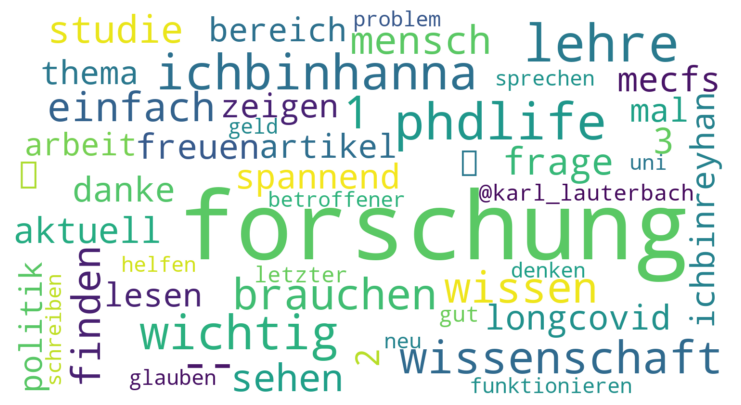

In [146]:
create_wordcloud(common_words_tweets)

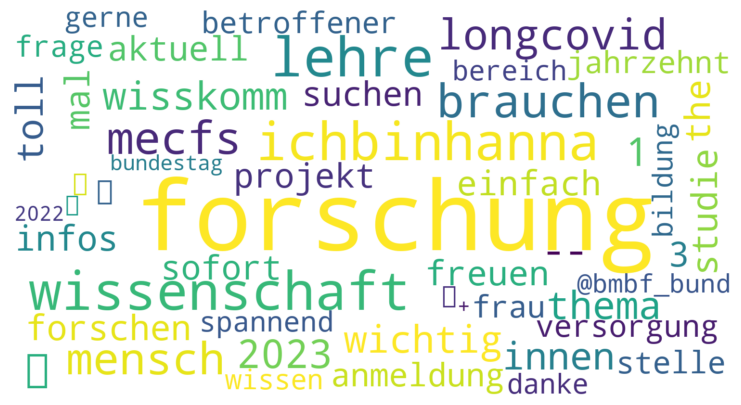

In [147]:
create_wordcloud(common_words_retweets)

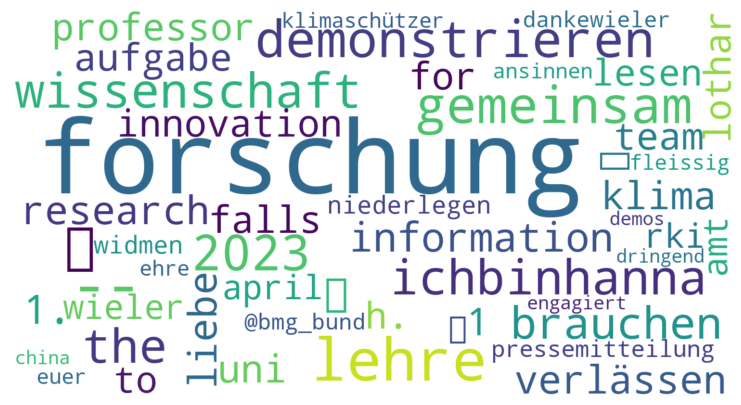

In [148]:
create_wordcloud(common_words_zitat_tweets)

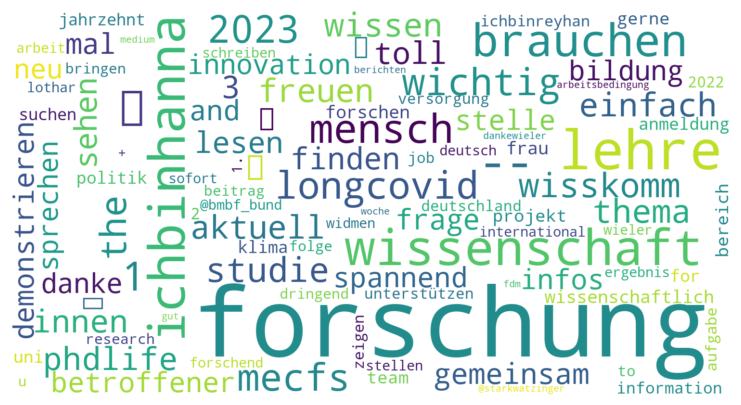

In [149]:
create_wordcloud(common_words_all)

#### Die häufigsten Wörter 2 - ohne Stoppwörter und Hashtags

In [150]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annalenahiergeist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
def common_words2(tweets):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()

    # Iteration über jeden Tweet
    for tweet in tweets:
        # Entfernen von Hashtags
        words = tweet.split()
        words = [word for word in words if not word.startswith('#')]

        # Wieder zusammenfügen zu einem String und Tokenisierung
        tweet = ' '.join(words)
        tokens = word_tokenize(tweet, language='german')

        # Filtern der Stoppwörter und Zählen
        words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
        word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [152]:
def common_words_all2(df):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()
    words = []
    names = ["tweet_text", "retweet_text_retweeted_tweet", "zitat_text"]
    for name in names:
           for tweet in df[name]:
               # Entfernen von Hashtags
                words = tweet.split()
                words = [word for word in words if not word.startswith('#')]
               
                # Wieder zusammenfügen zu einem String und Tokenisierung
                tweet = ' '.join(words)
                tokens = word_tokenize(tweet, language='german')

                # Filtern der Stoppwörter und Zählen
                words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
                word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [153]:
common_words_tweets2 = common_words2(tweets_wissenschaft['tweet_text'])
common_words_retweets2 = common_words2(tweets_wissenschaft['retweet_text_retweeted_tweet'])
common_words_zitat_tweets2 = common_words2(tweets_wissenschaft['zitat_text'])
common_words_all2 = common_words_all2(tweets_wissenschaft)

In [154]:
common_words_tweets2.head(50)

word  freq
0            forschung   289
1                  ich    54
2                  die    48
3                   es    36
4                  das    32
5                lehre    28
6                  und    27
7                  wir    23
8         wissenschaft    19
9                  wie    18
10             einfach    18
11                  in    18
12                 sie    17
13             wichtig    17
14            menschen    17
15              jahren    15
16                 was    15
17                auch    15
18               danke    15
19              wissen    14
20               innen    14
21                zeit    14
22                 the    13
23                  so    13
24               frage    13
25                hier    12
26                wenn    12
27                 mal    12
28                 ein    12
29                 der    12
30             artikel    12
31               zeigt    11
32             politik    11
33                aber    11
34               jahre    10
35                 mit    10
36             bereich    10
37             braucht    10
38            brauchen    10
39                 wer    10
40                   d     9
41               gerne     9
42               thema     9
43           schreiben     9
44                 weg     9
45              arbeit     8
46            sprechen     8
47                  im     8
48            arbeiten     8
49  arbeitsbedingungen     8

In [155]:
common_words_retweets2.head(50)

word  freq
0      forschung   443
1            die   109
2            wir    75
3          lehre    62
4          innen    59
5            das    59
6             es    52
7            ich    45
8       menschen    45
9   wissenschaft    44
10           sie    42
11           wie    41
12           der    38
13          auch    36
14           was    34
15           the    33
16          zeit    30
17          euch    30
18         thema    26
19          mehr    26
20            im    26
21         infos    26
22           mal    25
23       einfach    25
24            in    24
25          wenn    24
26        sofort    24
27         jahre    23
28       braucht    23
29      forschen    23
30     anmeldung    23
31          eine    23
32           wer    22
33            am    22
34         danke    21
35           ihr    21
36         jetzt    20
37       stellen    20
38         gerne    20
39        freuen    20
40        jahren    20
41           ein    19
42          alle    19
43           and    18
44           mit    18
45       projekt    18
46      brauchen    18
47    versorgung    18
48         heute    17
49       bereich    17

In [156]:
common_words_zitat_tweets2.head(50)

word  freq
0          forschung   166
1                das    38
2              lehre    37
3                the    35
4                wir    30
5                die    25
6              liebe    23
7                ihr    22
8               alle    21
9              innen    20
10                of    18
11      wissenschaft    18
12          verlässt    18
13               wie    17
14               was    17
15              hier    17
16             klima    17
17               uni    17
18     informationen    17
19                da    17
20               for    16
21                er    16
22       gemeinsamen    16
23              also    16
24             falls    16
25          research    15
26                to    15
27         professor    15
28            lothar    15
29            wieler    15
30               rki    15
31             april    15
32               amt    15
33       niederlegen    15
34          aufgaben    15
35            widmen    15
36  pressemitteilung    15
37     klimaschützer    15
38              euer    15
39          ansinnen    15
40             ehren    15
41     demonstrieren    15
42          fleissig    15
43         engagiert    15
44      demonstriert    15
45             china    15
46             demos    15
47          dringend    15
48         gebraucht    15
49               and    14

In [157]:
common_words_all2.head(50)

word  freq
0      forschung   898
1            die   182
2            das   129
3            wir   128
4          lehre   127
5            ich   113
6             es   100
7          innen    93
8            the    81
9   wissenschaft    81
10           wie    76
11      menschen    75
12           sie    68
13           was    66
14           der    63
15          auch    61
16            in    55
17          zeit    51
18       einfach    49
19           ihr    49
20          wenn    48
21         jahre    47
22            im    47
23           und    47
24          hier    46
25        jahren    45
26          euch    44
27          alle    42
28         danke    41
29           wer    41
30           and    39
31           mal    39
32         thema    38
33         infos    38
34          jahr    37
35       braucht    37
36       stellen    37
37         liebe    37
38       wichtig    36
39           mit    36
40           für    36
41         gerne    35
42           ein    35
43          eine    35
44         lesen    34
45           for    34
46       politik    34
47        freuen    34
48          mehr    34
49          also    33

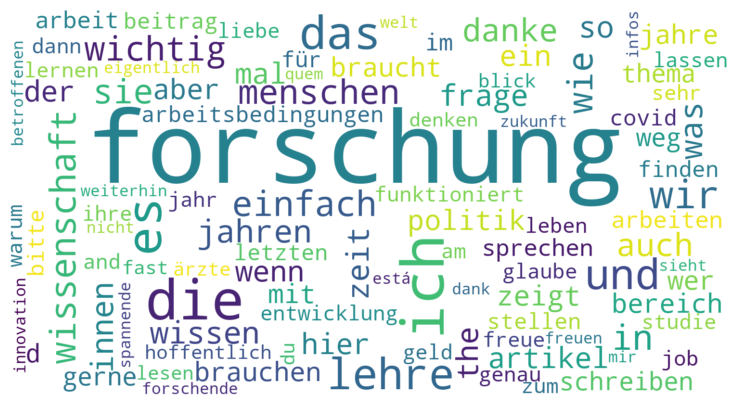

In [158]:
create_wordcloud(common_words_tweets2)

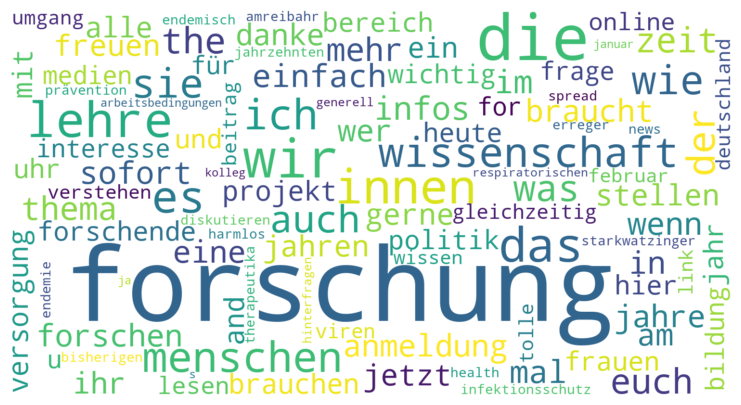

In [159]:
create_wordcloud(common_words_retweets2)

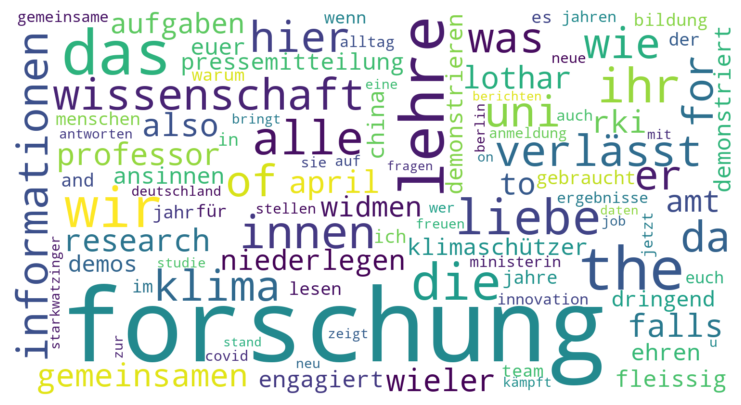

In [160]:
create_wordcloud(common_words_zitat_tweets2)

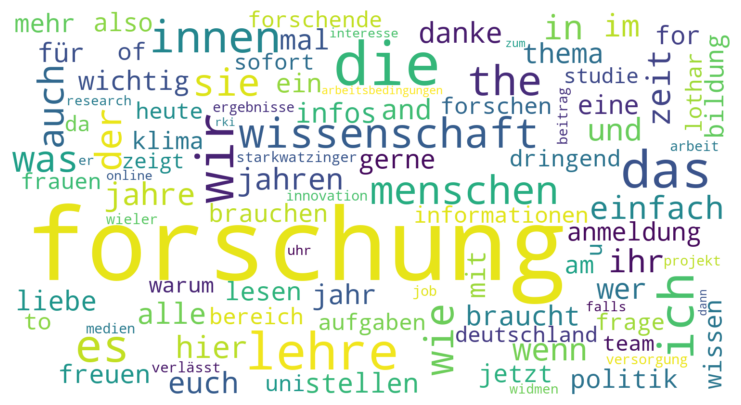

In [161]:
create_wordcloud(common_words_all2)

#### Häufigste Adjektive

In [162]:
def common_adjectives(df, name):
    adj_freq = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        # Filtern nach Adjektiven und Zählen
        adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
        adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [163]:
def common_adjectives_all(df):
    names = ["tweets", "retweets", "zitat_tweets"]
    adj_freq = Counter()
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
            adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [164]:
adjectives_tweets = common_adjectives(tweets_wissenschaft, 'tweets')
adjectives_retweets = common_adjectives(tweets_wissenschaft, 'retweets')
adjectives_zitat_tweets = common_adjectives(tweets_wissenschaft, 'zitat_tweets')
adjectives_all = common_adjectives_all(tweets_wissenschaft)

In [165]:
adjectives_all.head(50)

word  freq
0                 neue    69
1                neuen    50
2                 gute    42
3                liebe    31
4    wissenschaftliche    22
5          gemeinsamen    21
6                tolle    20
7              letzten    19
8            deutschen    17
9         erfolgreiche    17
10             weitere    15
11          bisherigen    15
12              andere    14
13            aktuelle    14
14    respiratorischen    14
15            wichtige    13
16          befristete    13
17          gemeinsame    13
18        verschiedene    12
19                este    12
20             bessere    12
21               junge    12
22           spannende    12
23              tolles    12
24              eigene    11
25           aktuellen    11
26          spannenden    11
27               echte    11
28            mögliche    11
29             falsche    10
30      nervtötendster    10
31            absurden    10
32          innovative    10
33        unbefristete    10
34               erste    10
35        akademischen    10
36             anderer    10
37             pariser    10
38              großen     9
39   interdisziplinäre     9
40           digitalen     9
41            sozialen     8
42             eigenen     8
43               guten     8
44       weitreichende     8
45  wissenschaftlichen     8
46           konkreten     7
47               neuer     7
48             saubere     7
49          empirische     7

In [166]:
adjectives_tweets.head(50)

word  freq
0                neue    14
1                gute    14
2             letzten     8
3               neuen     8
4              andere     6
5               guter     6
6             falsche     5
7               liebe     5
8           spannende     5
9              eigene     4
10   unterschiedliche     4
11       verschiedene     4
12          aktuellen     4
13              große     4
14          kritische     4
15           nächster     4
16               este     4
17            bessere     4
18             tollen     4
19              guten     4
20              neuer     3
21  wissenschaftliche     3
22         innovative     3
23           wichtige     3
24         spannenden     3
25           aktuelle     3
26          wichtiger     3
27   empfehlenswerter     3
28              echte     3
29            eigener     3
30            weitere     3
31          aktueller     3
32            schönen     3
33             großes     3
34            eigenen     3
35     internationale     3
36              tolle     3
37          konkreten     2
38             großen     2
39          schweizer     2
40            saubere     2
41          wichtiges     2
42              frühe     2
43          bestimmte     2
44        staatlichen     2
45           richtige     2
46          deutschen     2
47           weiteren     2
48              ganze     2
49  gesellschaftliche     2

In [167]:
adjectives_retweets

word  freq
0                        neue    37
1                       neuen    21
2                        gute    16
3                       tolle    15
4                  bisherigen    13
5            respiratorischen    13
6           wissenschaftliche    12
7                   deutschen    11
8                     weitere    11
9                      tolles    10
10                    letzten    10
11                    pariser    10
12                      erste     9
13               erfolgreiche     9
14                   wichtige     9
15                     andere     8
16                       este     8
17                 befristete     8
18                   aktuelle     8
19               verschiedene     7
20                 spannenden     7
21                     eigene     7
22               akademischen     7
23                   mögliche     7
24                    anderer     7
25          interdisziplinäre     7
26                      junge     7
27                     großen     6
28                   sozialen     6
29                  aktuellen     6
30               unbefristete     5
31                 empirische     5
32                geförderten     5
33                      liebe     5
34         wissenschaftlicher     5
35                   nächsten     5
36                großartiges     5
37                    bessere     5
38              weitreichende     5
39         wissenschaftlichen     5
40                   heutigen     5
41             nervtötendster     4
42                   absurden     4
43             psychologische     4
44                      guten     4
45                   deutsche     4
46                 klinischen     4
47                      neues     4
48                  digitalen     4
49                gemeinsamen     4
50                      neuer     4
51                    eigenen     4
52                  spannende     4
53                    falsche     4
54               ausgebildete     4
55                  geliebten     4
56                  konkreten     4
57                     großes     4
58              eigenständige     4
59                 innovative     4
60                 bestehende     4
61                    riesige     4
62                vorhandenes     4
63                   digitale     3
64                     besten     3
65                     liebes     3
66                      echte     3
67               medizinische     3
68                    saubere     3
69                veränderten     3
70                 politische     3
71  bildungswissenschaftliche     3
72                  folgenden     3
73                ökologische     3
74               interessante     3
75             germanistische     3
76            internationaler     3
77              herausragende     3
78                innovativer     3
79                 gemeinsame     3
80               persönlichen     3
81                 exzellente     3
82                  deutscher     3
83                  virtuelle     3
84                       hohe     3
85                   besseren     3
86                      kurze     3
87                  möglichen     3
88              klimagesundes     3
89                wichtigsten     3
90                    private     3
91                     stille     3
92                    schwere     3
93        neuroimmunologische     3
94                 spannender     3
95              nachstehenden     3
96                     neuste     3
97                 ländlichen     3
98                 großartige     3
99               vorschnelles     3

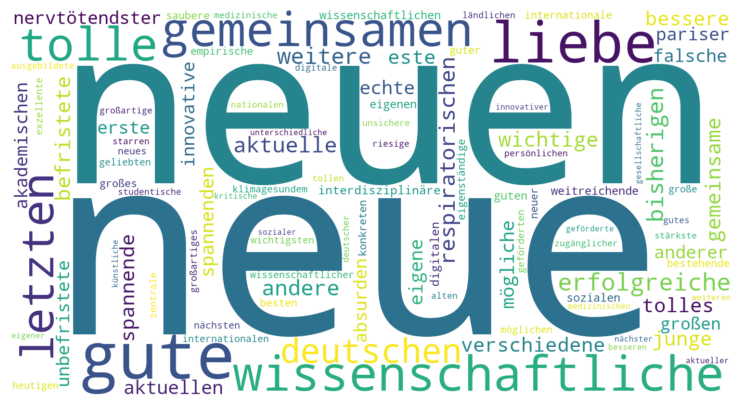

In [168]:
create_wordcloud(adjectives_all)

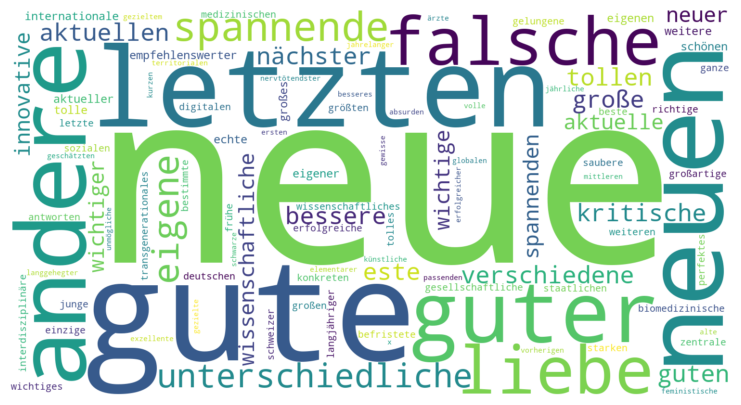

In [169]:
create_wordcloud(adjectives_tweets)

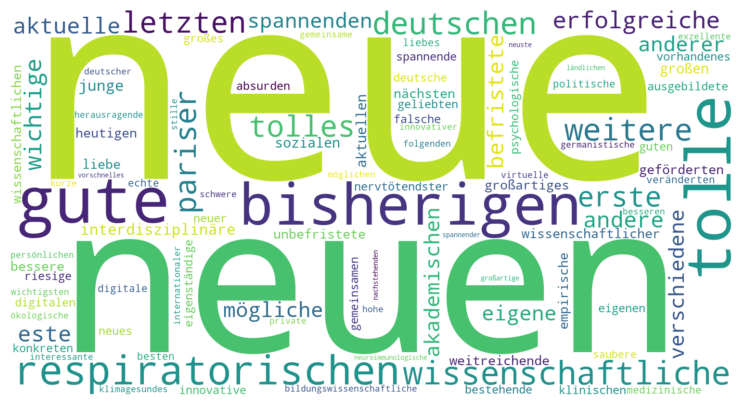

In [170]:
create_wordcloud(adjectives_retweets)

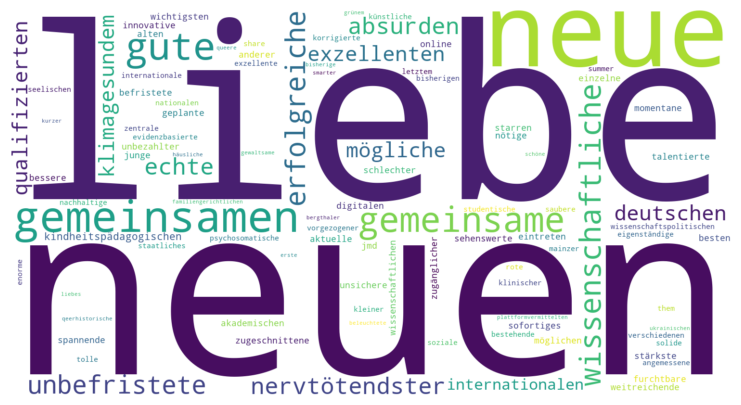

In [171]:
create_wordcloud(adjectives_zitat_tweets)

#### Häufigste Nomen 

In [172]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter

In [173]:
def filter_tokens2(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN"]

In [174]:
def common_nouns(df, name):
    nouns = []
    for doc in df[f"spacy_doc_{name}"]:
        nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(50)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [175]:
def common_nouns_all(df):
    names = ["tweets", "retweets", "zitat_tweets"]
    nouns = []
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(100)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [176]:
common_nouns_tweets = common_nouns(tweets_wissenschaft, 'tweets')
common_nouns_retweets = common_nouns(tweets_wissenschaft, 'retweets')
common_nouns_zitat_tweets = common_nouns(tweets_wissenschaft, 'zitat_tweets')
common_nouns_all = common_nouns_all(tweets_wissenschaft)

In [177]:
common_nouns_all

word  freq
0          forschung  1022
1              lehre   140
2       wissenschaft   113
3             mensch    75
4              thema    49
5             studie    44
6              frage    39
7             stelle    38
8              danke    37
9               frau    36
10           bereich    35
11           projekt    35
12           bildung    35
13               uni    34
14        innovation    34
15         anmeldung    34
16         jahrzehnt    33
17           politik    33
18       betroffener    33
19             klima    32
20              team    32
21           aufgabe    31
22       information    30
23             folge    29
24           beitrag    29
25            arbeit    28
26        versorgung    28
27          ergebnis    28
28  arbeitsbedingung    27
29         forschend    27
30             woche    27
31            medium    26
32       dankewieler    26
33         professor    24
34         erfahrung    23
35         interesse    23
36       entwicklung    23
37               dr.    23
38           problem    23
39           artikel    23
40             datum    23
41         bundestag    23
42                 ➡    23
43         professur    21
44          einblick    21
45            umgang    21
46             prof.    21
47             infos    21
48        behandlung    21
49           februar    21
50       anerkennung    21
51             april    21
52               amt    21
53        hochschule    20
54             blick    20
55           vortrag    20
56  mecfsimbundestag    20
57  pressemitteilung    20
58      tiktoktagung    20
59            person    19
60              ziel    19
61              geld    19
62              link    19
63          programm    19
64       drittmittel    19
65        geschichte    18
66        erkrankung    18
67       universität    18
68           medizin    17
69            alltag    17
70       klimawandel    17
71   @starkwatzinger    17
72     klimaschützer    17
73          ansinnen    17
74              ehre    17
75        erkenntnis    16
76              welt    16
77             stand    16
78       publikation    16
79               weg    16
80                ’s    16
81             monat    16
82        bibliothek    16
83         verhalten    16
84       möglichkeit    15
85   herausforderung    15
86             rolle    15
87               job    15
88           zukunft    15
89        studierend    15
90        ministerin    15
91             leute    15
92          pandemie    15
93            chance    15
94        prävention    15
95         bewerbung    15
96              arzt    14
97         krankheit    14
98              kind    14
99            januar    14

In [178]:
common_nouns_tweets

word  freq
0                   forschung   307
1                       lehre    31
2                wissenschaft    23
3                      mensch    17
4                       frage    15
5                       danke    13
6                       thema    12
7                     bereich    12
8                     artikel    12
9                      arbeit    11
10                    politik    11
11                     studie    11
12                        uni    10
13                       geld    10
14                    problem    10
15           arbeitsbedingung     9
16                    beitrag     9
17                entwicklung     8
18                betroffener     8
19                        weg     8
20                      woche     8
21                       ziel     7
22                       arzt     7
23                       frau     7
24                 erkrankung     7
25                      grund     7
26                       kind     7
27                     schule     7
28                      monat     7
29                   ergebnis     7
30                       idee     6
31                       fall     6
32                      blick     6
33            herausforderung     6
34                    medizin     6
35                      leben     6
36                       welt     6
37                    zukunft     6
38                  forschend     6
39                      infos     6
40                    bildung     6
41                    vortrag     6
42                    kontext     6
43                       form     6
44  forschungsdatenmanagement     6
45                     stelle     6
46                       ding     5
47                     person     5
48                technologie     5
49                       spaß     5

In [179]:
common_nouns_retweets

word  freq
0          forschung   518
1              lehre    69
2       wissenschaft    64
3             mensch    45
4              thema    33
5            projekt    24
6          anmeldung    24
7             studie    23
8               frau    22
9             stelle    22
10         jahrzehnt    22
11        versorgung    21
12       betroffener    20
13             frage    20
14           bereich    19
15             danke    19
16         bundestag    19
17           bildung    17
18           politik    17
19               dr.    17
20  mecfsimbundestag    17
21      tiktoktagung    17
22             folge    16
23         interesse    16
24           beitrag    16
25              team    16
26            medium    16
27         forschend    16
28  arbeitsbedingung    15
29            umgang    15
30        innovation    15
31          programm    14
32             prof.    14
33         professur    13
34         erfahrung    13
35           februar    13
36       anerkennung    13
37        behandlung    13
38       drittmittel    13
39           endemie    13
40           erreger    13
41  infektionsschutz    13
42        prävention    13
43     therapeutikum    13
44               vir    13
45             woche    12
46        geschichte    12
47            januar    12
48             infos    12
49          einblick    12

In [180]:
common_nouns_zitat_tweets

word  freq
0          forschung   197
1              lehre    40
2       wissenschaft    26
3              klima    17
4                uni    17
5        information    17
6          professor    16
7            aufgabe    16
8              april    15
9                amt    15
10  pressemitteilung    15
11                 ➡    15
12       dankewieler    15
13     klimaschützer    15
14          ansinnen    15
15              ehre    15
16              team    14
17        innovation    14
18            mensch    13
19           bildung    12
20          ergebnis    11
21            studie    10
22            stelle    10
23            alltag    10
24        ministerin    10
25                 🤔    10
26             folge     9
27                 👉     9
28         anmeldung     9
29             datum     8
30       klimawandel     8
31           antwort     8
32         erfahrung     7
33         jahrzehnt     7
34             woche     7
35   herausforderung     7
36   @starkwatzinger     7
37     gerechtigkeit     7
38     verantwortung     7
39              frau     7
40         verhalten     7
41       anerkennung     7
42        hochschule     7
43            arbeit     7
44            person     6
45             stand     6
46        erkenntnis     6
47           projekt     6
48       entwicklung     6
49        sicherheit     6

##### Wordclouds

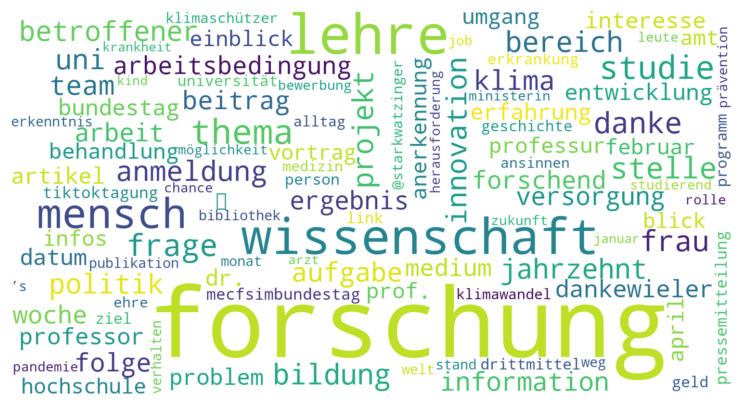

In [181]:
create_wordcloud(common_nouns_all)

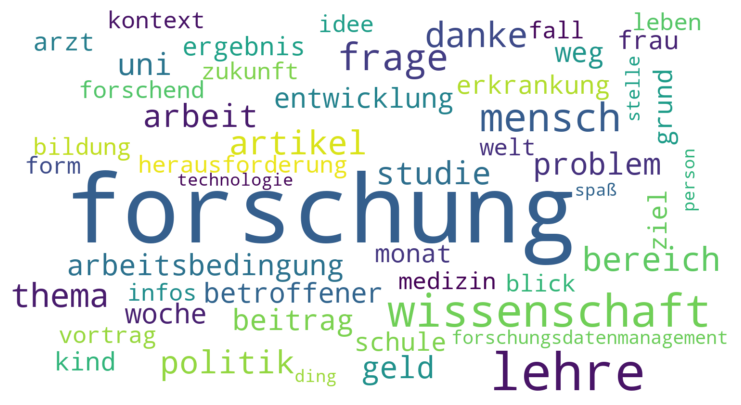

In [182]:
create_wordcloud(common_nouns_tweets)

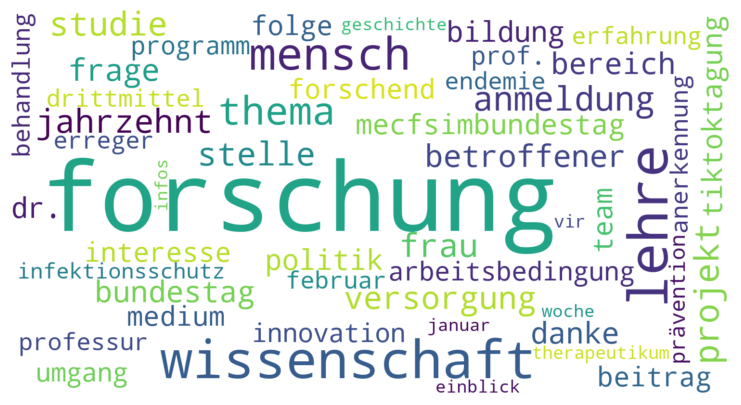

In [183]:
create_wordcloud(common_nouns_retweets)

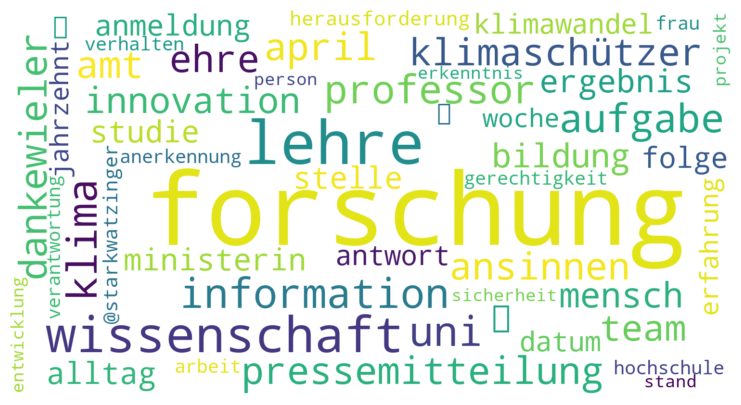

In [184]:
create_wordcloud(common_nouns_zitat_tweets)

### Bios

In [185]:
def common_words_lemmas(lemmas_df):
    word_freq = Counter(lemmas_df)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [186]:
def get_lemmas_bios(df):
    lemmas = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        for token in row[f"spacy_doc_bios"]:
            if not token.is_punct and \
            not token.is_space and \
            not token.is_bracket and \
            not token.is_digit and \
            not token.is_quote and \
            not token.like_url and \
            not token.like_email:
                lemmas.append(token.lemma_)
    return lemmas

In [187]:
lemmas_bios = get_lemmas_bios(accounts_wissenschaft)
common_words_bios = common_words_lemmas(lemmas_bios)

  0%|          | 0/569 [00:00<?, ?it/s]

In [188]:
common_words_bios.head(50)

word  freq
0               |   374
1             und   254
2              in   150
3             and   119
4              --   111
5              of   109
6             der    70
7              at    64
8             her    60
9             PhD    56
10            für    44
11             my    43
12       research    36
13      Professor    34
14          sheen    33
15            own    33
16            the    31
17        Science    31
18            for    30
19              I    28
20             an    26
21              ️    26
22          Media    25
23            are    25
24       Research    24
25            The    22
26           with    21
27        Digital    21
28     Researcher    21
29         privat    21
30     University    20
31         Mutter    18
32            she    18
33            mit    18
34        Student    18
35      Political    17
36  Communication    17
37              🇪    17
38            ihr    17
39            And    16
40        Postdoc    16
41          views    16
42        History    15
43     Interested    15
44            sie    15
45      Scientist    14
46      Historian    14
47         Gender    14
48             ||    14
49              ❤    14

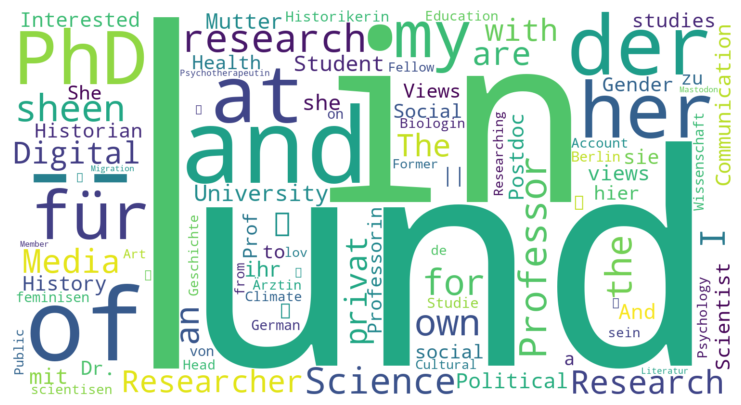

In [189]:
create_wordcloud(common_words_bios)

In [190]:
common_nouns_bios = common_nouns(accounts_wissenschaft, 'bios')
common_nouns_bios

word  freq
0                    professor    32
1                       mutter    18
2                      student    18
3                        media    17
4                            🇪    15
5                          dr.    13
6                  professorin    13
7                 historikerin    12
8                          she    11
9                 wissenschaft    10
10                  geschichte    10
11                     account    10
12                      ärztin     9
13                    biologin     9
14                   education     9
15                   studentin     8
16                  feministin     8
17                     autorin     8
18           psychotherapeutin     8
19                      social     7
20                   migration     7
21                   forschung     7
22                      senior     7
23                     postdoc     7
24                 psychologin     7
25                  researcher     7
26                  soziologin     7
27                 psychologie     7
28               mitarbeiterin     6
29                      editor     6
30                    lecturer     6
31                journalistin     5
32                     politik     5
33                      doctor     5
34                    academic     5
35                    feminist     5
36                     medizin     5
37                       tweet     5
38                       katze     5
39                  feminismus     5
40           wissenschaftlerin     5
41  wissenschaftskommunikation     5
42                      medium     5
43     kulturwissenschaftlerin     5
44                         uni     5
45                   literatur     5
46                    mitglied     5
47                      former     5
48                           👩     5
49                    juristin     4

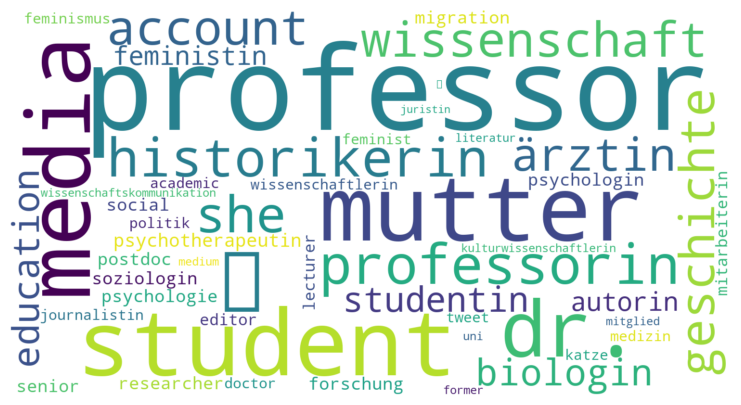

In [191]:
create_wordcloud(common_nouns_bios)

Zusatzanalyse: Vorkommen von "she" und "her"

In [192]:
she_count = 0
her_count = 0
for doc in accounts_wissenschaft["spacy_doc_bios"]:
    # Zählen der Wörter im Dokument
    for token in doc:
        if token.text.lower() == 'she':
            she_count += 1
        elif token.text.lower() == 'her':
                her_count += 1
            
print(f"'She' count: {she_count}")
print(f"'Her' count: {her_count}")

'She' count: 64
'Her' count: 64


## Analyse der Hashtags

In [193]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [194]:
def count_hashtags_all(df):
    hashtags = []
    
    for index, row in df.iterrows():
        for column in ['tweet_text', 'retweet_text_retweeted_tweet', 'zitat_text']:
            hashtags.extend(re.findall(r'#\w+', str(row[column])))
    
    hashtags_counter = Counter(hashtags)
    
    top_n_hashtags = hashtags_counter.most_common(30)
    for hashtag, count in top_n_hashtags:
        print(f"{hashtag}: {count}")
    
    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtags_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#Forschung: 112
#IchBinHanna: 86
#MECFS: 62
#LongCovid: 56
#phdlife: 41
#IchBinReyhan: 30
#IchbinHanna: 29
#Wissenschaft: 29
#FDM: 28
#DankeWieler: 27
#Wisskomm: 21
#TikTokTagung: 20
#WissKomm: 19
#4GenderStudies: 18
#MECFSimBundestag: 16
#forschung: 12
#Forschungsdatenmanagement: 12
#Klimawandel: 10
#Lehre: 8
#Sachsen: 8
#UniarchivTUD: 8
#wisskomm: 7
#Atomwaffen: 7
#Kernwaffenteststoppvertrag: 7
#Kernfusion: 7
#Corona: 7
#Arbeitszeiterfassung: 7
#Datenpublikation: 7
#Zukunftsstrategie: 7
#atoms4war: 6


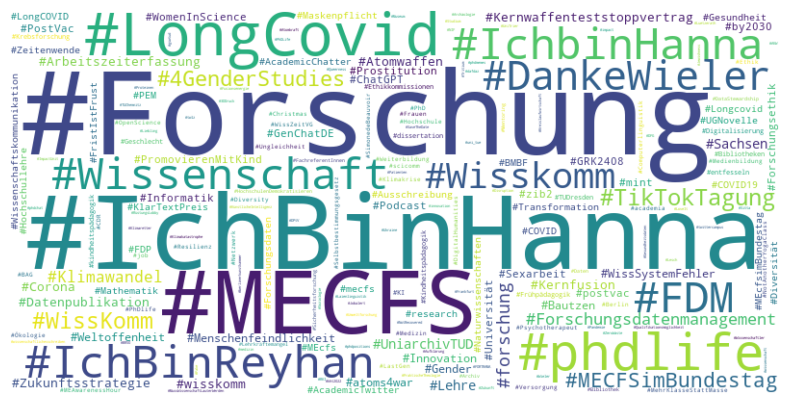

In [195]:
# Tweets Wissenschaft
count_hashtags_all(tweets_wissenschaft)

In [196]:
def count_hashtags_seperate(df):
    hashtags_per_column = {'tweet_text': Counter(), 'retweet_text_retweeted_tweet': Counter(), 'zitat_text': Counter()}
    
    for index, row in df.iterrows():
        for column in hashtags_per_column:
            hashtags_per_column[column].update(re.findall(r'#\w+', str(row[column])))
    
    for column, hashtags_counter in hashtags_per_column.items():
        print(f"Top hashtags in {column}:")
        top_n_hashtags = hashtags_counter.most_common(20)
        for hashtag, count in top_n_hashtags:
            print(f"{hashtag}: {count}")
        print()

In [197]:
count_hashtags_seperate(tweets_wissenschaft)

Top hashtags in tweet_text:
#phdlife: 26
#IchBinHanna: 21
#Forschung: 16
#IchBinReyhan: 12
#MECFS: 11
#LongCovid: 10
#FDM: 10
#Forschungsdatenmanagement: 6
#4GenderStudies: 5
#wisskomm: 5
#PromovierenMitKind: 5
#UniarchivTUD: 4
#GenChatDE: 4
#Diversity: 3
#IchbinHanna: 3
#WissSystemFehler: 3
#DankeWieler: 3
#WissKomm: 3
#Klimawandel: 2
#scicomm: 2

Top hashtags in retweet_text_retweeted_tweet:
#Forschung: 63
#IchBinHanna: 49
#MECFS: 42
#LongCovid: 34
#Wissenschaft: 19
#TikTokTagung: 17
#IchBinReyhan: 16
#IchbinHanna: 15
#Wisskomm: 15
#MECFSimBundestag: 13
#WissKomm: 12
#FDM: 10
#forschung: 9
#DankeWieler: 9
#4GenderStudies: 8
#Sachsen: 6
#phdlife: 6
#Lehre: 5
#Weltoffenheit: 5
#Menschenfeindlichkeit: 5

Top hashtags in zitat_text:
#Forschung: 33
#IchBinHanna: 16
#DankeWieler: 15
#LongCovid: 12
#IchbinHanna: 11
#phdlife: 9
#MECFS: 9
#Wissenschaft: 8
#FDM: 8
#Wisskomm: 6
#4GenderStudies: 5
#Klimawandel: 5
#Zukunftsstrategie: 5
#GRK2408: 4
#Naturwissenschaften: 4
#Mathematik: 4
#Informati

## Zusatz

In [198]:
# Suche nach Tweets mit "innen"
common_words_all2.loc[common_words_all2['word'] == 'innen']

word  freq
7  innen    93

In [199]:
for index, row in tweets_wissenschaft.iterrows():
    # Überprüfen, ob 'innen' im 'tweet_text' vorhanden ist
    if pd.notna(row['tweet_text']) and 'innen' in row['tweet_text']:
        print('Tweet:', row['tweet_text'])
    
    if pd.notna(row['retweet_text_retweeted_tweet']) and 'innen' in row['retweet_text_retweeted_tweet']:
        print('Retweet:', row['retweet_text_retweeted_tweet'])

    if pd.notna(row['retweet_text_retweeted_tweet']) and 'innen' in row['retweet_text_retweeted_tweet']:
        print('Zitierter Tweet:', row['zitat_text'])

Retweet: Mareike Trauernicht hat den 2. Preis der Körber Stiftung im Bereich Sozialwissenschaften für Ihre Forschung zum Thema Erschöpfun und Burnout von Erzieher:innen erhalten. Gerade hoch aktuell in der #twitterkita 
Zitierter Tweet: 
Retweet: Immer mehr Doktorand:innen wünschen sich eine unbefristete Stelle in #Forschung oder #Lehre ohne Professur. An der #UniBremen ist das durch die neuen Jobkategorien Researcher und Lecturer möglich. Mehr darüber: #Up2DateUniBremen
Zitierter Tweet: 
Retweet: Gestern der Launch von und gerade ist auch unser Buch eingetroffen! Was für ein tolles Gefühl, wenn 3 Jahre Forschung Früchte tragen. Danke an die besten Kolleg*innen! 🐊🐚⚗️ @mfnberlin @HumboldtUni @kulturSPK #berlinerkunstkammer 
Zitierter Tweet: 
Retweet: Gestern der Launch von und gerade ist auch unser Buch eingetroffen! Was für ein tolles Gefühl, wenn 3 Jahre Forschung Früchte tragen. Danke an die besten Kolleg*innen! 🐊🐚⚗️ @mfnberlin @HumboldtUni @kulturSPK #berlinerkunstkammer 
Zitierter 